# Loading Data, Import Libraries

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset, using different encoding due to non printable ascii characters

df = pd.read_csv('./datasets/spotify-2023.csv', encoding="latin")

# Test if dataset is loaded
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Defining Data


1. track_name: Name of the song

2. artist(s)_name: Name of the artist(s) of the song

3. artist_count: Number of artists contributing to the song

4. released_year: Year when the song was released

5. released_month: Month when the song was released

6. released_day: Day of the month when the song was released

7. in_spotify_playlists: Number of Spotify playlists the song is included in

8. in_spotify_charts: Presence and rank of the song on Spotify charts

9. streams: Total number of streams on Spotify

10. in_apple_playlists: Number of Apple Music playlists the song is included in

11. in_apple_charts: Presence and rank of the song on Apple Music charts

12. in_deezer_playlists: Number of Deezer playlists the song is included in

13. in_deezer_charts: Presence and rank of the song on Deezer charts

14. in_shazam_charts: Presence and rank of the song on Shazam charts

15. bpm: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

16. key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

17. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

18. danceability_%: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

19. valence_%: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

20. energy_%: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

21. acousticness_%: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

22. instrumentalness_%: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

23. liveness_%: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


24. speechiness_%: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

# EDA

1. Display information about dataset

In [3]:
# Display info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [4]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

- From this, we can tell that there are null values, which we will later remove

In [6]:
print(list(df.select_dtypes("object").columns))

['track_name', 'artist(s)_name', 'in_deezer_playlists', 'in_shazam_charts', 'key', 'mode']


- These categorical data would either be dropped or one hot encoded later on

# Cleaning the Dataset


1. The dataset contains some empty values. We will drop all rows that contain any empty values. 

In [7]:
# Drops values that are empty

df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


2. Some integers contain ",". We will remove all "," within the dataset so the strings can be converted to integers properly.

In [8]:
target_columns = ["in_deezer_playlists", "in_shazam_charts"]

for column in target_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))
    df[column] = df[column].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    int64 
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    int64 
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


3. We choose to sum up chart appearances and playlists appearances into their individual columns

In [9]:
def combine_columns(data: pd.DataFrame, result: str, targets: list):
    data[result] = data[targets].astype(int).sum(axis=1)
    for target in targets:
        data.drop(target, axis=1, inplace=True)

combine_columns(df, "in_charts", ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'])
combine_columns(df, "in_playlists", ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major,80,89,83,31,0,8,4,1246,641
1,LALA,Myke Towers,1,2023,3,23,133716286,92,C#,Major,71,61,74,7,0,10,4,570,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major,51,32,53,17,0,31,6,1283,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major,55,58,72,11,0,11,15,867,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor,65,23,80,14,63,11,6,623,3304


4. Notice how older songs have more streams? Older songs have an advantage over newer songs in terms of streams, which will effect our anaylsis as the popularity of newer songs would be inaccurately potrayed. To fix this, we make a new column called 'streams_per_month' to balance the streams out by months since release.

In [10]:
current_year = 2024
current_month = 3
df['months_since_release'] = ((current_year - df['released_year']) * 12) + (current_month - df['released_month']) 
df['streams_per_month'] = df['streams'] / df['months_since_release']
df['streams_per_month'] = df['streams_per_month'].astype('int')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists,months_since_release,streams_per_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major,...,89,83,31,0,8,4,1246,641,8,17672712
1,LALA,Myke Towers,1,2023,3,23,133716286,92,C#,Major,...,61,74,7,0,10,4,570,1580,12,11143023
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major,...,32,53,17,0,31,6,1283,1582,9,15555997
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major,...,58,72,11,0,11,15,867,8099,55,14560742
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor,...,23,80,14,63,11,6,623,3304,10,30323632


5. One hot encode categorical values

In [11]:
def one_hot_encode(data: pd.DataFrame, column: str):
   data[column] = data[column].astype("category").cat.codes

one_hot_encode(df, 'key')
one_hot_encode(df, 'mode')

# df = pd.get_dummies(df, columns=['key', 'mode'])
print(df['key'].unique())
# [ 2   3    7   0   4   8    10   9   6   1    5]
# ['B' 'C#' 'F' 'A' 'D' 'F#' 'G#' 'G' 'E' 'A#' 'D#']
print(df['mode'].unique())
# [0,     1]
# [Major, Minor]

df.head()


[ 2  3  7  0  4  8 10  9  6  1  5]
[0 1]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists,months_since_release,streams_per_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,2,0,...,89,83,31,0,8,4,1246,641,8,17672712
1,LALA,Myke Towers,1,2023,3,23,133716286,92,3,0,...,61,74,7,0,10,4,570,1580,12,11143023
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,7,0,...,32,53,17,0,31,6,1283,1582,9,15555997
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,0,0,...,58,72,11,0,11,15,867,8099,55,14560742
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,0,1,...,23,80,14,63,11,6,623,3304,10,30323632


Mapped values:
1. Key:\
[ 0   1    2   3    4   5    6   7   8    9   10 ]\
['A' 'A#' 'B' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']

2. Mode:\
[0,     1]\
[Major, Minor]

In [12]:
from sklearn.preprocessing import StandardScaler

def scale(data: pd.DataFrame, target: str):
    scaler = StandardScaler()
    scaler.fit(data[target].to_frame())
    data[target] = scaler.fit_transform(data[target].to_frame())

to_scale = ["streams_per_month", "in_charts", "in_playlists"]
for scale_target in to_scale:
    scale(df, scale_target)

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,bpm,key,mode,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists,months_since_release,streams_per_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,2,0,...,89,83,31,0,8,4,5.766232,-0.529168,8,0.389718
1,LALA,Myke Towers,1,2023,3,23,133716286,92,3,0,...,61,74,7,0,10,4,2.300295,-0.422162,12,-0.187729
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,7,0,...,32,53,17,0,31,6,5.955936,-0.421934,9,0.202528
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,0,0,...,58,72,11,0,11,15,3.823051,0.320721,55,0.114514
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,0,1,...,23,80,14,63,11,6,2.572033,-0.225701,10,1.508491


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            816 non-null    object 
 1   artist(s)_name        816 non-null    object 
 2   artist_count          816 non-null    int64  
 3   released_year         816 non-null    int64  
 4   released_month        816 non-null    int64  
 5   released_day          816 non-null    int64  
 6   streams               816 non-null    int64  
 7   bpm                   816 non-null    int64  
 8   key                   816 non-null    int8   
 9   mode                  816 non-null    int8   
 10  danceability_%        816 non-null    int64  
 11  valence_%             816 non-null    int64  
 12  energy_%              816 non-null    int64  
 13  acousticness_%        816 non-null    int64  
 14  instrumentalness_%    816 non-null    int64  
 15  liveness_%            816 no

# Data Visualisation

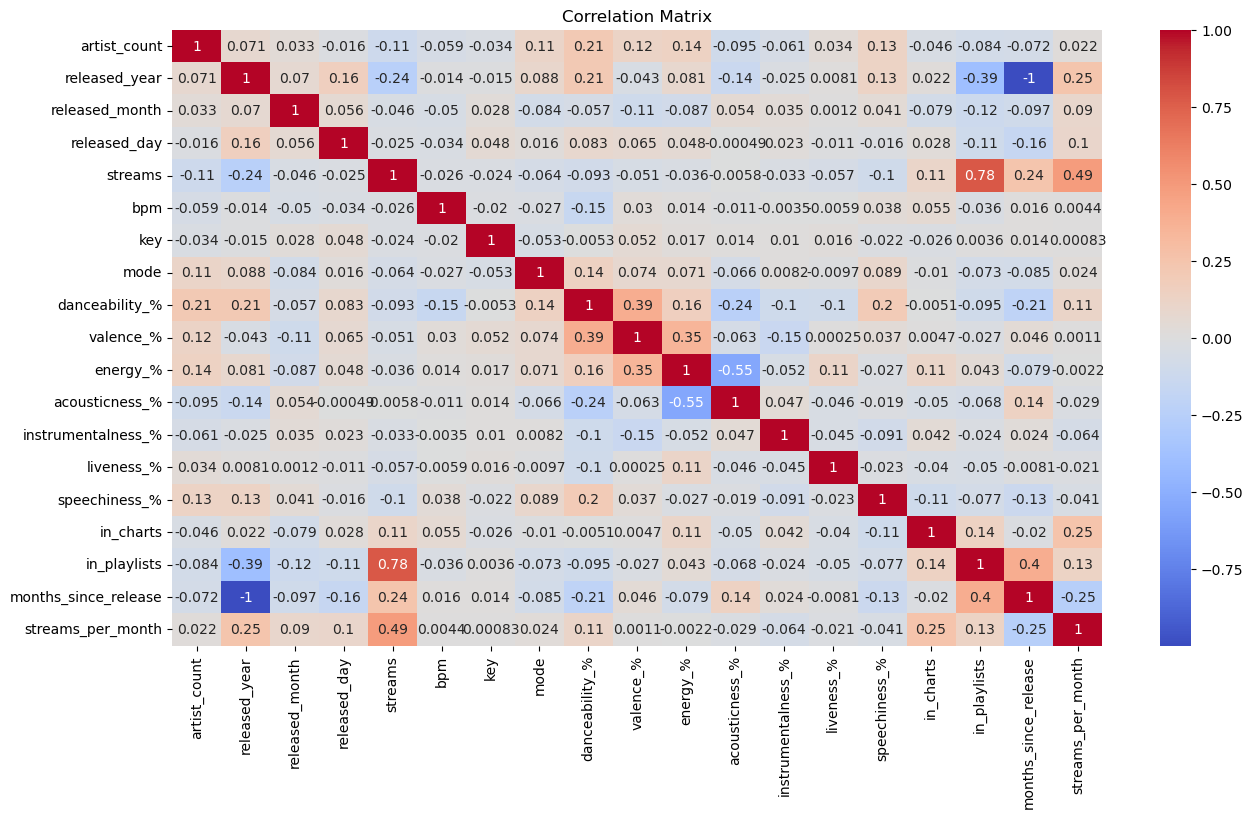

In [14]:
# Plot a correlation matrix

cmatrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 8))
sns.heatmap(cmatrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# sns.pairplot(data=df.drop("released_year", axis=1).drop("released_month", axis=1).drop("released_day", axis=1).drop("artist_count", axis=1), diag_kind="kde")
# Commented as this takes alot of resources

<Axes: xlabel='bpm', ylabel='streams_per_month'>

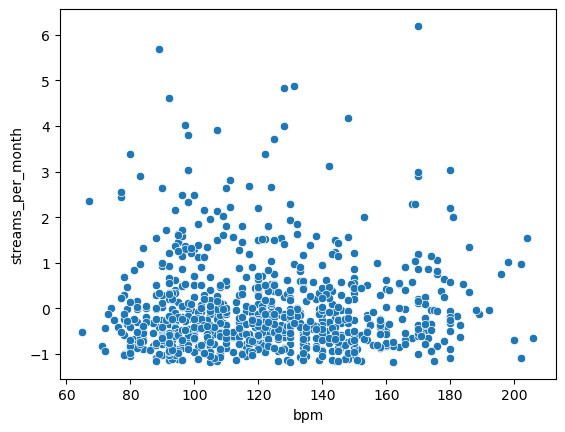

In [16]:
sns.scatterplot(x='bpm', y='streams_per_month', data=df)

- From this scatterplot, we can see that people prefer to listen to songs with a bpm >= 80 and <=180. Songs out of that range tend to have lower streams.

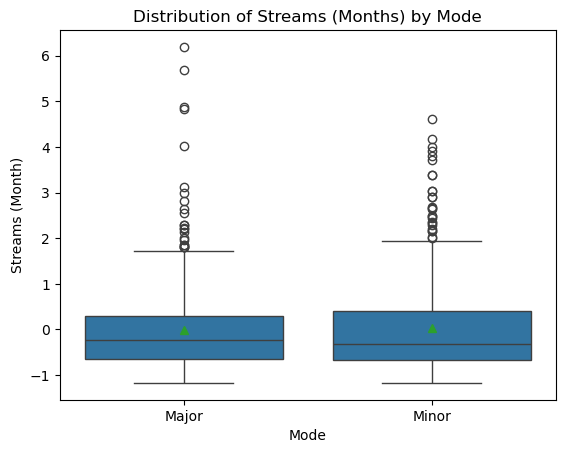

In [17]:
sns.boxplot(x='mode', y='streams_per_month', showmeans=True, data=df)

plt.xlabel('Mode')
plt.ylabel('Streams (Month)')
plt.title('Distribution of Streams (Months) by Mode')
plt.xticks([0, 1], ['Major', 'Minor'])
plt.show()

- Firstly, songs in minor have a larger IQR, which indicates a higher range in streams, leaning towards the higher side.
- Songs in major, however, despite having lower average streams, has a quite a few songs that has done exceptionally better than songs in minor keys.
- This indicates that if done right, songs in major have potentially to become a big hit.

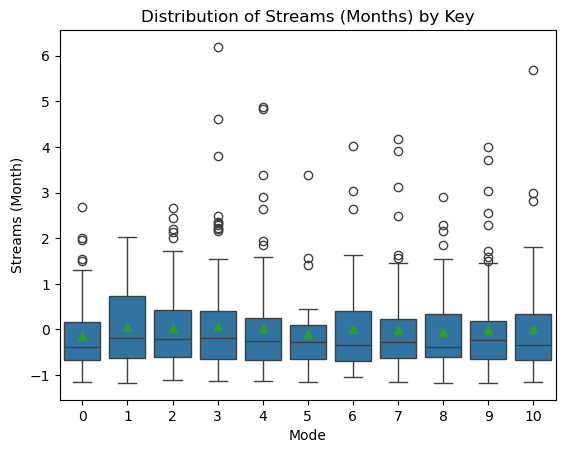

In [18]:
sns.boxplot(x='key', y='streams_per_month', showmeans=True, data=df)

plt.xlabel('Mode')
plt.ylabel('Streams (Month)')
plt.title('Distribution of Streams (Months) by Key')
plt.show()

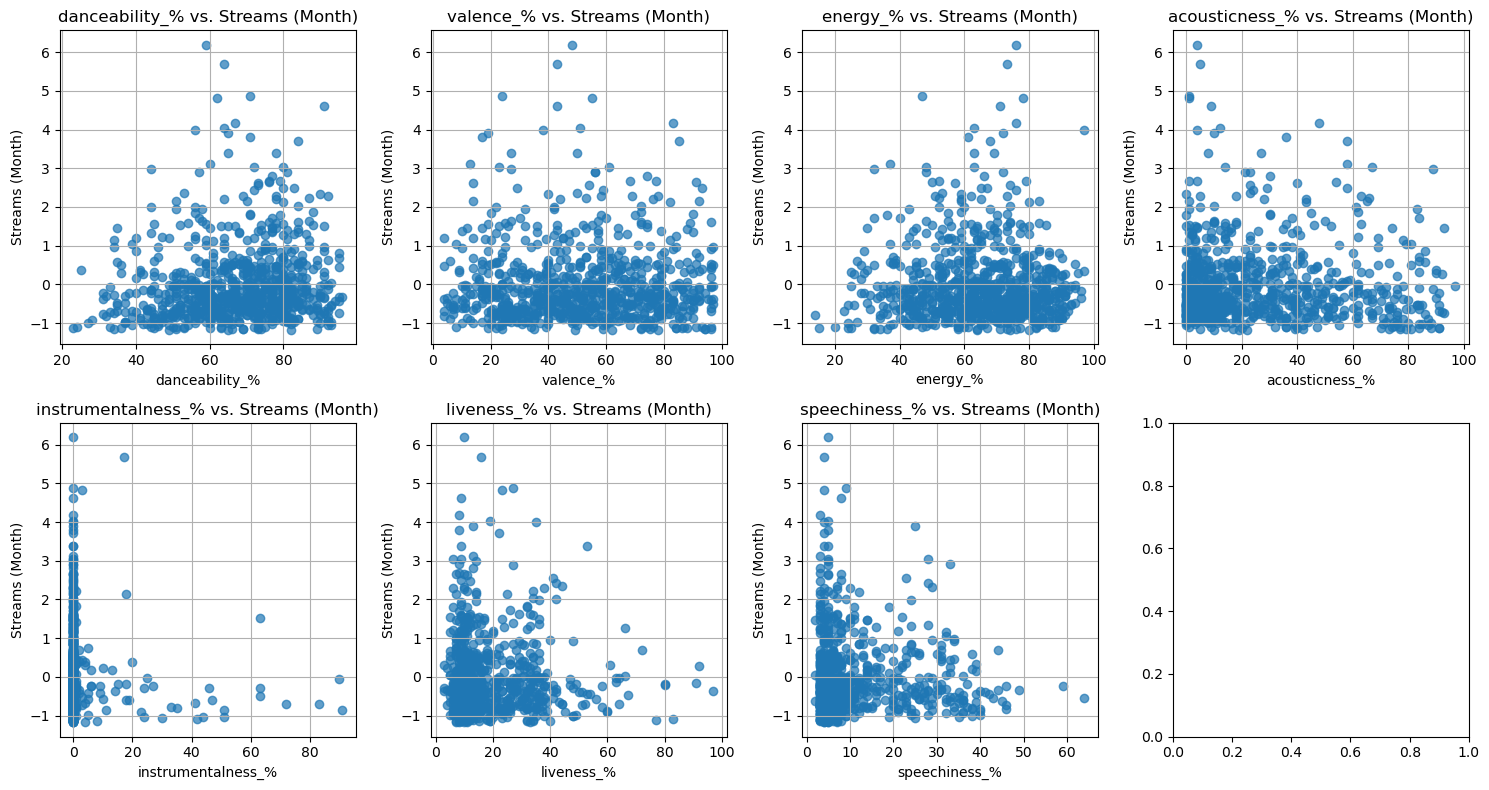

In [19]:
# Plot % against streams

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['streams_per_month'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('Streams (Month)')
   axes[col, row].set_title(f'{feature} vs. Streams (Month)')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

- Top songs are at least 20% **danceable**
- Distribution of **valence** is balanced
- Top songs have at least 20% **energy**
- **Acousticness** of top songs may vary, but the ones that are the least **acoustic** have the most streams
- Top songs are mostly not **instrumental**, indicating that they have vocals
- Top songs have low **liveness**, indicating that they are unlikely to be recorded with a live audience
- Most songs top songs have low to medium **speechiness**, indicating that most songs have vocals but not all have spoken words

# Modelling


We will create a regression model as we are predicting continuous data.

We will be predicting the number of streams based on:
- "in_charts"
- "in_playlists"

It is important to limit the number of features used to prevent [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

In [20]:
x = df[["in_charts", "in_playlists"]]
y = df["streams_per_month"]
x.head()

,in_charts,in_playlists
0,5.766232,-0.529168
1,2.300295,-0.422162
2,5.955936,-0.421934
3,3.823051,0.320721
4,2.572033,-0.225701


Split data up into training and testing data.

In [21]:
from sklearn.model_selection import train_test_split

x1_train, x1_val, y1_train, y1_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evalulate_model(model, x_val, y_val, label):
    y_pred = model.predict(x_val)
    acc = model.score(x_val, y_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print("--------------------")
    print("Results for {}".format(label))
    print("Accuracy/r^2 (Higher is better): {:.3f}".format(acc))
    print("mse (Lower is better): {:.3f}".format(mse))
    print("rmse (Lower is better): {:.3f}".format(rmse))

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def try_models(x_train, x_val, y_train, y_val, label1, label2):
    print("Evalulating models comparing {} against {}".format(label1, label2))

    lr = LinearRegression()
    lr.fit(x_train, y_train)
    evalulate_model(lr, x_val, y_val, "Linear")

    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)
    evalulate_model(tree, x_val, y_val, "Decision Tree")

    kn = KNeighborsRegressor()
    kn.fit(x_train, y_train)
    evalulate_model(kn, x_val, y_val, "K Nearest Neighbours")

    svm1 = SVR()
    svm1.fit(x_train, y_train)
    evalulate_model(svm1, x_val, y_val, "Support Vector")

    mlp = MLPRegressor(max_iter=1000)
    mlp.fit(x_train, y_train)
    evalulate_model(mlp, x_val, y_val, "Multi-layer perceptron")

    print("--------------------")

In [24]:
try_models(x1_train, x1_val, y1_train, y1_val, "streams_per_month", "in_models and in_playlists")

Evalulating models comparing streams_per_month against in_models and in_playlists
--------------------
Results for Linear
Accuracy/r^2 (Higher is better): 0.087
mse (Lower is better): 0.948
rmse (Lower is better): 0.974
--------------------
Results for Decision Tree
Accuracy/r^2 (Higher is better): -0.093
mse (Lower is better): 1.135
rmse (Lower is better): 1.065
--------------------
Results for K Nearest Neighbours
Accuracy/r^2 (Higher is better): 0.220
mse (Lower is better): 0.810
rmse (Lower is better): 0.900
--------------------
Results for Support Vector
Accuracy/r^2 (Higher is better): 0.280
mse (Lower is better): 0.748
rmse (Lower is better): 0.865
--------------------
Results for Multi-layer perceptron
Accuracy/r^2 (Higher is better): 0.333
mse (Lower is better): 0.692
rmse (Lower is better): 0.832
--------------------


We can see that KNearestNeighboursRegressor consistently works the best.